In [4]:
import pandas as pd
import numpy as np

In [5]:
temp = pd.read_csv('/content/temperature.csv')
bins = pd.read_csv('/content/BinSize.csv')
merged = pd.merge(temp, bins, on='ID')

In [6]:
merged.to_csv('merged_data.csv', index=False) # Call to_csv on the DataFrame 'merged' and provide a filename
                                             # index=False prevents the index from being written to the CSV

In [7]:
temp["ID"].unique()


array(['USW00094889', 'USC00208972', 'USC00200032', 'USC00205563',
       'USC00200230', 'USW00014833', 'USC00207308', 'USC00203712',
       'USW00004848', 'USC00200220', 'USC00205822', 'USC00200842',
       'USC00205450', 'USC00201250', 'USC00207320', 'USC00200228',
       'USC00202308', 'USW00014853', 'USC00205050', 'USC00208202',
       'USC00208080', 'USC00207312', 'USC00205451', 'USC00201502'],
      dtype=object)

In [8]:
bins["ID"].unique()


array(['AE000041196', 'AEM00041194', 'AEM00041217', ..., 'ZI000067775',
       'ZI000067975', 'ZI000067983'], dtype=object)

In [9]:
merged["ID"].unique()


array(['USW00094889', 'USC00208972', 'USC00200032', 'USC00205563',
       'USC00200230', 'USW00014833', 'USC00207308', 'USC00203712',
       'USW00004848', 'USC00200220', 'USC00205822', 'USC00200842',
       'USC00205450', 'USC00201250', 'USC00207320', 'USC00200228',
       'USC00202308', 'USW00014853', 'USC00205050', 'USC00208202',
       'USC00208080', 'USC00207312', 'USC00205451', 'USC00201502'],
      dtype=object)

In [10]:
merged['Temp_C'] = merged['Data_Value'] / 10


In [29]:
merged.head(2)

,ID,Date,Element,Data_Value,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,...,x,y,x_group,y_group,xy_group,hash,Year,Month,Day,Temp_C
0,USW00094889,2014-11-12,TMAX,22,42.2228,-83.7444,255.7,MI,ANN ARBOR MUNI AP,NaN,...,-6.895857e+06,4.694968e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...,2014,11,12,2.2
1,USC00208972,2009-04-29,TMIN,56,42.4356,-83.7831,276.1,MI,WHITMORE LAKE 1NW,NaN,...,-6.875744e+06,4.718630e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...,2009,4,29,5.6


In [12]:
# Convert Date to datetime
merged['Date'] = pd.to_datetime(merged['Date'], format='%Y-%m-%d')
merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day  # Extracts the day

In [13]:
print(merged[['Temp_C', 'LATITUDE', 'LONGITUDE', 'ELEVATION']].describe())

# Element distribution
print(merged['Element'].value_counts(normalize=True))

              Temp_C       LATITUDE      LONGITUDE      ELEVATION
count  165085.000000  165085.000000  165085.000000  165085.000000
mean        9.542212      42.098636     -83.777855     240.024859
std        12.351513       0.205987       0.266502      38.635245
min       -34.300000      41.563100     -84.466700     176.200000
25%         0.000000      41.955300     -83.985800     204.200000
50%         9.400000      42.123600     -83.761100     237.700000
75%        18.900000      42.241700     -83.618600     274.300000
max        40.600000      42.435600     -83.280000     304.200000
Element
TMAX    0.503153
TMIN    0.496847
Name: proportion, dtype: float64


<ipython-input-14-31c0c9c748ce>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Temp_C', hue='Element', data=merged, ci=None)


<Axes: xlabel='Month', ylabel='Temp_C'>

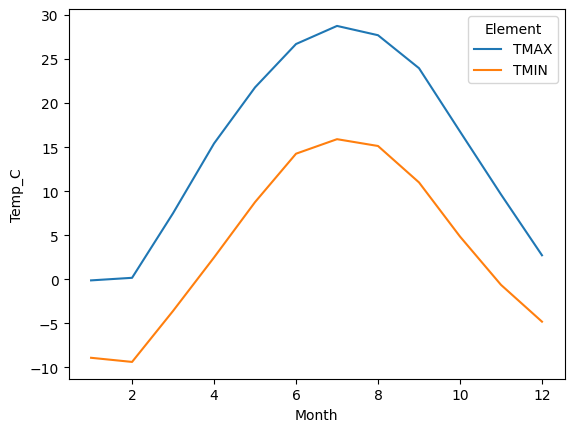

In [14]:
# Monthly trends
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Month', y='Temp_C', hue='Element', data=merged, ci=None)

In [15]:


# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

merged['Season'] = merged['Month'].apply(get_season)


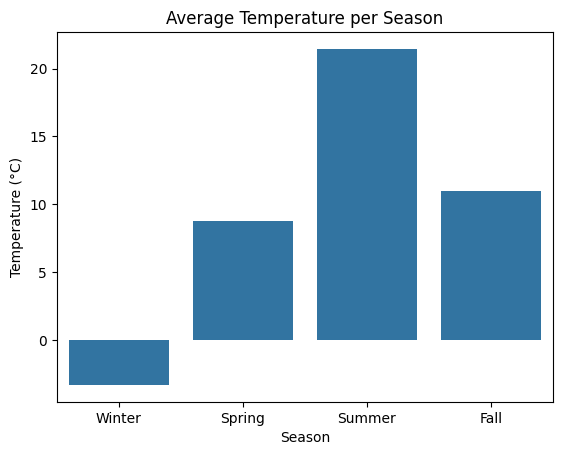

In [16]:
seasonal_avg_temp = merged.groupby("Season")["Temp_C"].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Season", y="Temp_C", data=seasonal_avg_temp, order=["Winter", "Spring", "Summer", "Fall"])
plt.title("Average Temperature per Season")
plt.ylabel("Temperature (°C)")
plt.xlabel("Season")
plt.show()


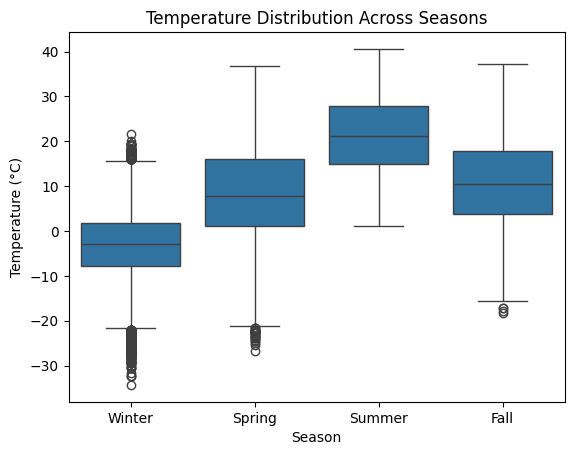

<ipython-input-17-bfeb587fa347>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Season', y='Temp_C', hue='Element', data=merged, ci=None)


<Axes: xlabel='Season', ylabel='Temp_C'>

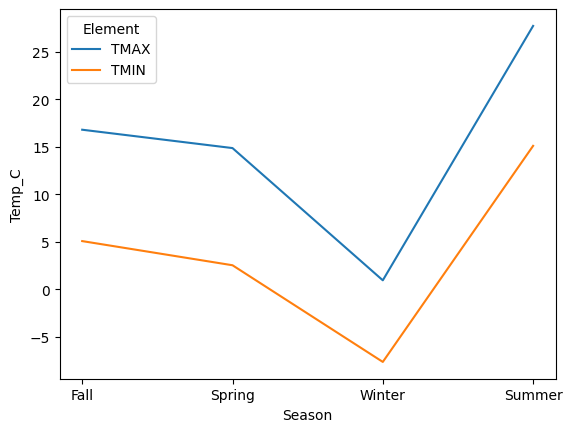

In [17]:
# Monthly trends
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Season', y='Temp_C', hue='Element', data=merged, ci=None)

<ipython-input-19-31c0c9c748ce>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Temp_C', hue='Element', data=merged, ci=None)


<Axes: xlabel='Month', ylabel='Temp_C'>

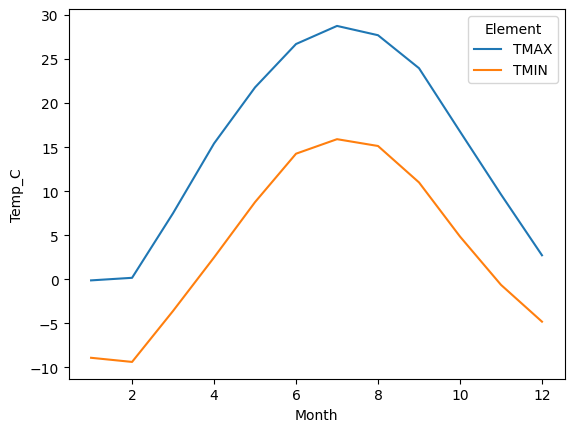

In [19]:
# Monthly trends
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Month', y='Temp_C', hue='Element', data=merged, ci=None)

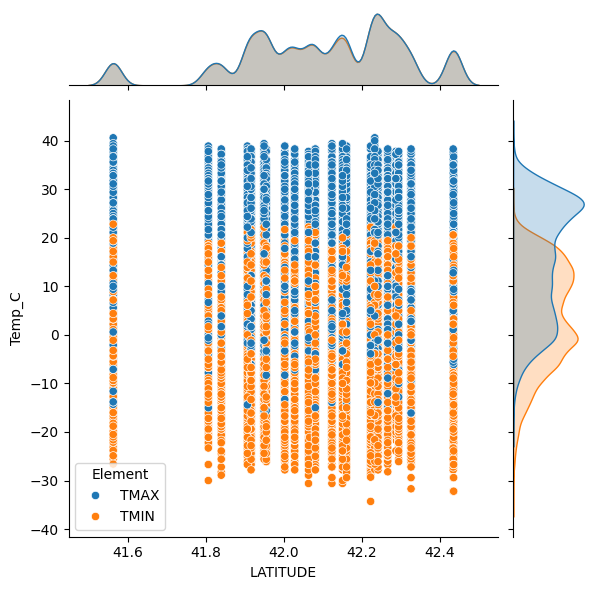

In [ ]:
# Temperature vs Latitude
sns.jointplot(x='LATITUDE', y='Temp_C', hue='Element', data=merged, kind='scatter')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_features = merged[['LATITUDE', 'LONGITUDE', 'ELEVATION', 'Month']]
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i)
                   for i in range(len(numerical_features.columns))]
print(vif_data)

     feature           VIF
0   LATITUDE  46990.556591
1  LONGITUDE  46504.684167
2  ELEVATION     42.399290
3      Month      4.586735


In lower elevations (260m - 280m), temperature decreases as expected,
Normally, as you go higher, it gets colder.
But in some places, after a certain height (280m), temperature starts increasing instead of decreasing.
This could be due to warm air getting trapped above cooler air, creating an inversion layer (like a blanket holding in heat).


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


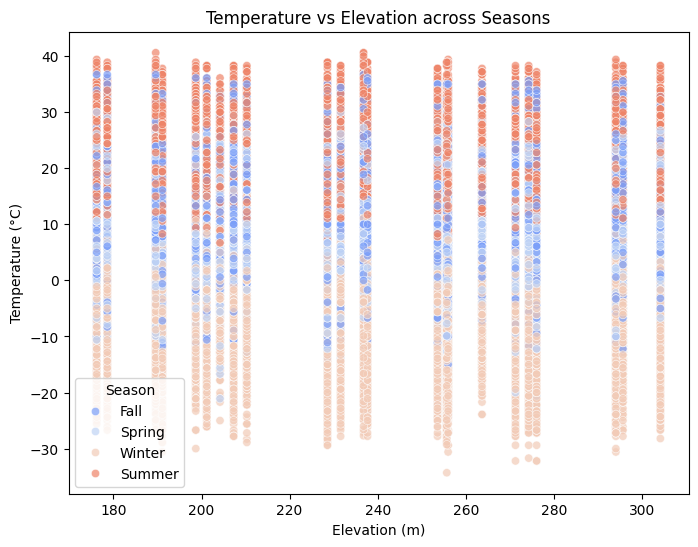

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ELEVATION', y='Temp_C', hue='Season', data=merged, alpha=0.7, palette="coolwarm")
plt.xlabel("Elevation (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Elevation across Seasons")
plt.legend(title="Season")
plt.show()


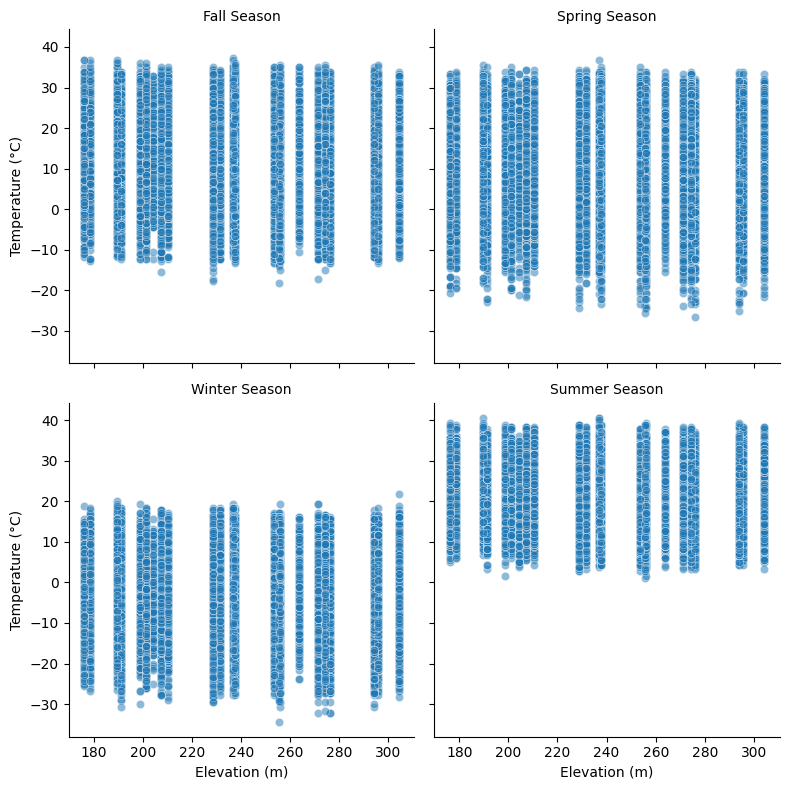

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(merged, col="Season", col_wrap=2, height=4)
g.map(sns.scatterplot, "ELEVATION", "Temp_C", alpha=0.5)
g.set_axis_labels("Elevation (m)", "Temperature (°C)")
g.set_titles(col_template="{col_name} Season")
plt.show()


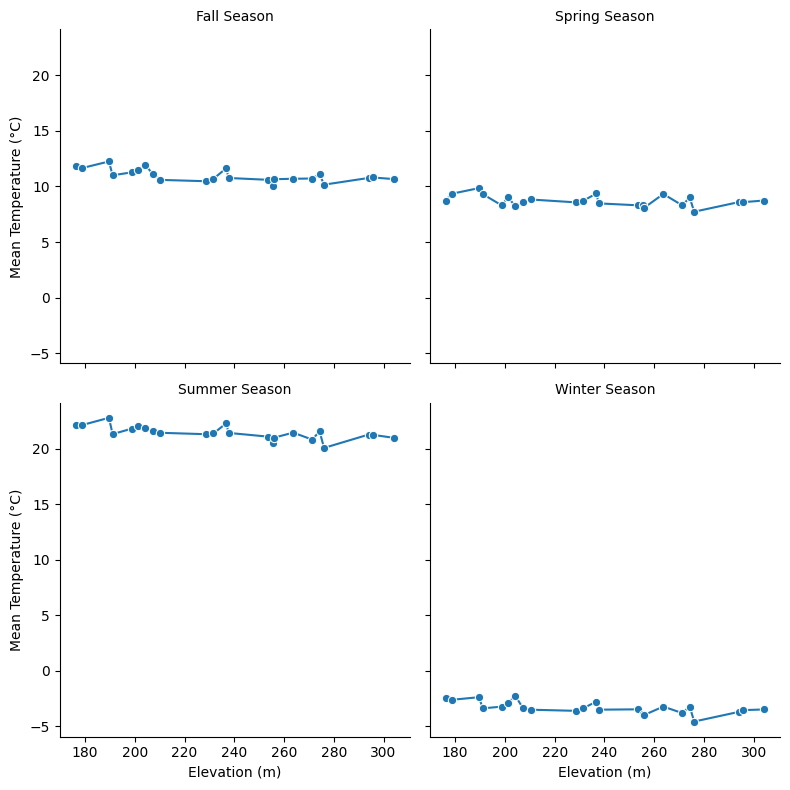

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Elevation and Season, then take the mean temperature
mean_temp = merged.groupby(["ELEVATION", "Season"], as_index=False)["Temp_C"].mean()

# Plot using lineplot
g = sns.FacetGrid(mean_temp, col="Season", col_wrap=2, height=4)
g.map(sns.lineplot, "ELEVATION", "Temp_C", marker="o")
g.set_axis_labels("Elevation (m)", "Mean Temperature (°C)")
g.set_titles(col_template="{col_name} Season")
plt.show()


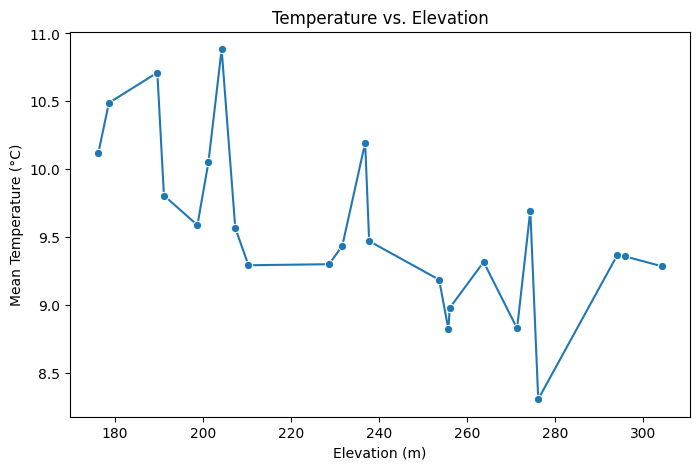

In [ ]:
# Group by Elevation and take the mean temperature
mean_temp = merged.groupby("ELEVATION", as_index=False)["Temp_C"].mean()

# Plot using lineplot
plt.figure(figsize=(8, 5))
sns.lineplot(x="ELEVATION", y="Temp_C", data=mean_temp, marker="o")
plt.xlabel("Elevation (m)")
plt.ylabel("Mean Temperature (°C)")
plt.title("Temperature vs. Elevation")
plt.show()


In [ ]:
merged["NAME"].unique()

array(['ANN ARBOR MUNI AP', 'WHITMORE LAKE 1NW', 'ADRIAN 2 NNE', 'MONROE',
       'ANN ARBOR U OF MICH', 'JACKSON REYNOLDS FLD', 'SALINE', 'HELL',
       'TOLEDO METCALF FLD', 'ANN ARBOR 1W', 'NEWPORT 4SSE',
       'BLISSFIELD 1NNE', 'MILAN 4 ESE', 'CARLETON 2W', 'SAMARIA',
       'ANN ARBOR SE', 'DUNDEE', 'DETROIT WILLOW RUN AP', 'MANCHESTER',
       'TIPTON 2WNW', 'TECUMSEH', 'SALINE 4SW', 'MILAN WWTP', 'CHELSEA'],
      dtype=object)

Toledo and Metcalf recorded the highest temperature at 40.6°C. Milan4Ese has an average temperature of 10.883°C. Temperature fluctuations across seasons can be observed, showing periods of increase and decrease.
(So flight services can be planned according to this)




In [ ]:

# Get top stations
top_stations = merged.groupby('NAME')['Temp_C'].agg(['mean','std','max','min']).sort_values('mean', ascending=False).head(5)

top_stations

,mean,std,max,min
NAME,,,,
MILAN 4 ESE,10.883906,12.318916,36.1,-25.0
TOLEDO METCALF FLD,10.711619,12.163395,40.6,-26.6
MONROE,10.488333,12.061984,38.9,-26.7
ANN ARBOR U OF MICH,10.197485,12.052569,37.8,-26.1
DETROIT WILLOW RUN AP,10.194932,12.412356,40.6,-27.7


Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

<ipython-input-56-8666cb00aa23>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  records = historical.groupby(['Month', 'Day']).apply(


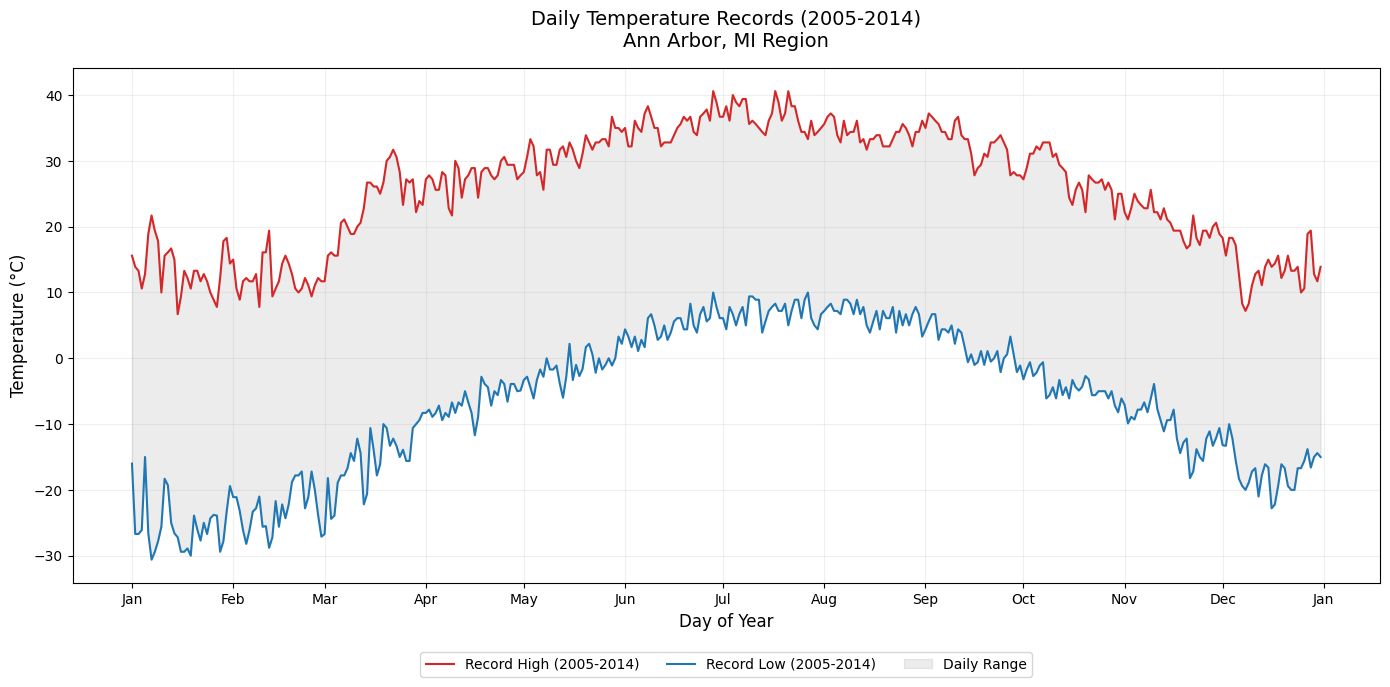

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data and remove leap days
merged = merged[~((merged['Month'] == 2) & (merged['Day'] == 29))]

# Filter historical data (2005-2014)
historical = merged[merged['Year'].between(2005, 2014)]

# Calculate daily records
records = historical.groupby(['Month', 'Day']).apply(
    lambda x: pd.Series({
        'Record_High': x.loc[x['Element'] == 'TMAX', 'Data_Value'].max() / 10,
        'Record_Low': x.loc[x['Element'] == 'TMIN', 'Data_Value'].min() / 10
    })
).reset_index()

records['Date'] = pd.to_datetime(
    records[['Month', 'Day']].assign(Year=2013)
)

# Create plot
plt.figure(figsize=(14, 7))
plt.plot(records['Date'], records['Record_High'], color='#d62728', linewidth=1.5, label='Record High (2005-2014)')
plt.plot(records['Date'], records['Record_Low'], color='#1f77b4', linewidth=1.5, label='Record Low (2005-2014)')

# Shade between the lines
plt.fill_between(records['Date'], records['Record_High'], records['Record_Low'],
                color='grey', alpha=0.15, label='Daily Range')

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Add titles and labels
plt.title('Daily Temperature Records (2005-2014)\nAnn Arbor, MI Region',
         fontsize=14, pad=15)
plt.grid(alpha=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Show plot
plt.tight_layout()
plt.show()

Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

In 2015, the region experienced its lowest recorded temperatures. Additionally, the highest temperature ranged between 33.5-34°C, which did not surpass the average summer temperature from 2005-2014. This indicates a temperature drop of 7°C during the summer season. Further analysis suggests that this change was influenced by environmental factors(Polar Vortex,Lake Effect Snow)

<ipython-input-3-c3f745dc55c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Year'] = merged['Date'].dt.year
<ipython-input-3-c3f745dc55c2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Month'] = merged['Date'].dt.month


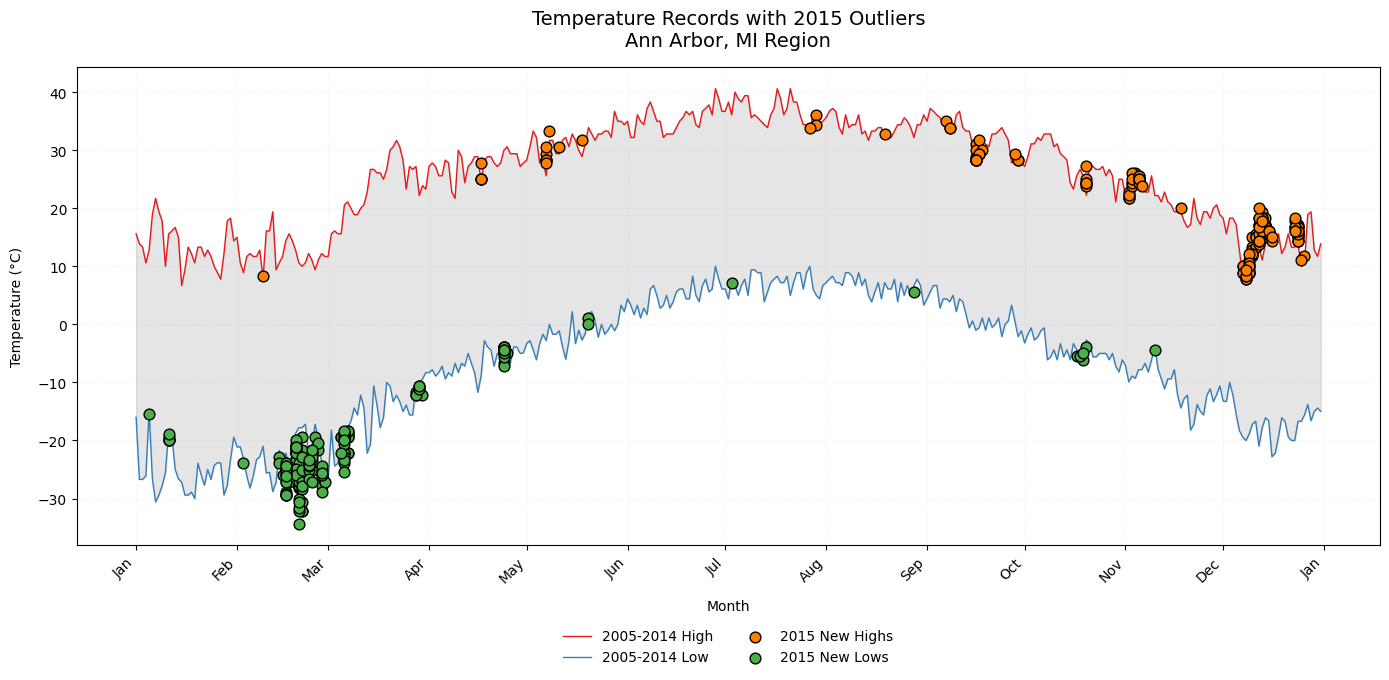

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Calculate historical records (2005-2014)
historical = merged[merged['Year'].between(2005, 2014)]
records = historical.groupby(['Month', 'Day']).agg(
    Record_High=('Temp_C', lambda x: x[historical.loc[x.index, 'Element'] == 'TMAX'].max()),
    Record_Low=('Temp_C', lambda x: x[historical.loc[x.index, 'Element'] == 'TMIN'].min())
).reset_index()

# Create Plot_Date for historical records with 2013 as base year
records['Plot_Date'] = pd.to_datetime(
    records[['Month', 'Day']].assign(Year=2013)  # Use 2013 instead of 2012
)

# Process 2015 data
data_2015 = merged[merged['Year'] == 2015].copy()
merged_2015 = data_2015.merge(records, on=['Month', 'Day'])

# Identify outliers and create Plot_Date for them
outliers = merged_2015[
    ((merged_2015['Element'] == 'TMAX') & (merged_2015['Temp_C'] > merged_2015['Record_High'])) |
    ((merged_2015['Element'] == 'TMIN') & (merged_2015['Temp_C'] < merged_2015['Record_Low']))
].copy()
outliers['Plot_Date'] = pd.to_datetime(
    outliers[['Month', 'Day']].assign(Year=2013)  # Use 2013 for consistency
)

# Create visualization
plt.figure(figsize=(14, 7))

# Plot historical records
plt.plot(records['Plot_Date'], records['Record_High'], color='#e41a1c',
         linewidth=1, label='2005-2014 High')
plt.plot(records['Plot_Date'], records['Record_Low'], color='#377eb8',
         linewidth=1, label='2005-2014 Low')
plt.fill_between(records['Plot_Date'], records['Record_High'], records['Record_Low'],
                 color='grey', alpha=0.2)

# Plot 2015 outliers
plt.scatter(
    outliers[outliers['Element'] == 'TMAX']['Plot_Date'],
    outliers[outliers['Element'] == 'TMAX']['Temp_C'],
    color='#ff7f00', edgecolor='black', s=60,
    label='2015 New Highs', zorder=3
)

plt.scatter(
    outliers[outliers['Element'] == 'TMIN']['Plot_Date'],
    outliers[outliers['Element'] == 'TMIN']['Temp_C'],
    color='#4daf4a', edgecolor='black', s=60,
    label='2015 New Lows', zorder=3
)

# Format plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Records with 2015 Outliers\nAnn Arbor, MI Region',
          fontsize=14, pad=15)
plt.xlabel('Month', labelpad=10)
plt.ylabel('Temperature (°C)', labelpad=10)
plt.grid(alpha=0.2, linestyle=':')
plt.legend(loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, -0.15), frameon=False)
plt.tight_layout()
plt.show()


Comparing with 2015 and 2016,to check whether 2015 is anomaly or not?

2015 is anomaly,because we cant see any new records in 2016,confirming it is due to another environmental factors(Polar Vortex,Lake Effect Snow)



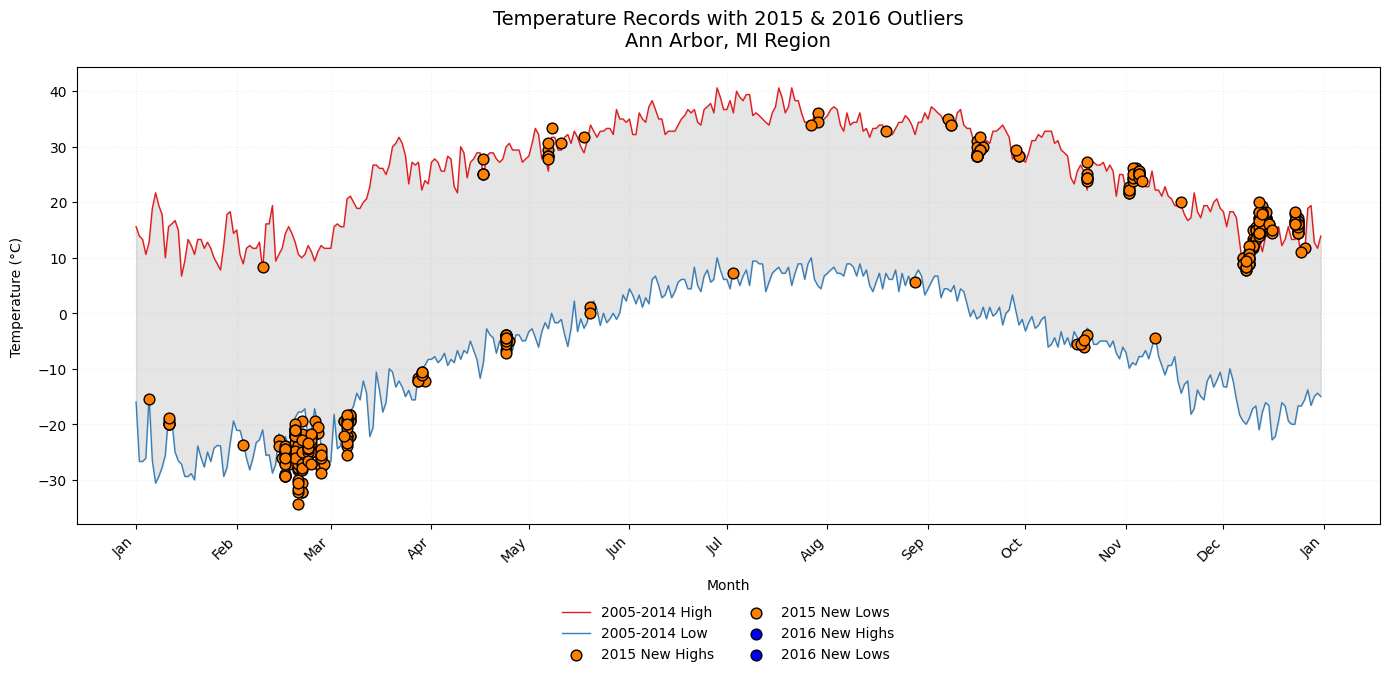

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare data
temp = pd.read_csv('/content/temperature.csv')
bins = pd.read_csv('/content/BinSize.csv')
merged = pd.merge(temp, bins, on='ID')

# Convert dates and filter leap days
merged['Date'] = pd.to_datetime(merged['Date'], format='%Y-%m-%d')
merged = merged[~((merged['Date'].dt.month == 2) & (merged['Date'].dt.day == 29))]
merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day
merged['Temp_C'] = merged['Data_Value'] / 10  # Unit conversion

# Calculate historical records (2005-2014)
historical = merged[merged['Year'].between(2005, 2014)]
records = historical.groupby(['Month', 'Day']).agg(
    Record_High=('Temp_C', lambda x: x[historical.loc[x.index, 'Element'] == 'TMAX'].max()),
    Record_Low=('Temp_C', lambda x: x[historical.loc[x.index, 'Element'] == 'TMIN'].min())
).reset_index()

# Create Plot_Date for historical records
records['Plot_Date'] = pd.to_datetime(
    records[['Month', 'Day']].assign(Year=2012)  # Base year
)

# Process 2015 and 2016 data
data_2015 = merged[merged['Year'] == 2015].copy()
data_2016 = merged[merged['Year'] == 2016].copy()
merged_2015 = data_2015.merge(records, on=['Month', 'Day'])
merged_2016 = data_2016.merge(records, on=['Month', 'Day'])

# Identify outliers and create Plot_Date for them
def identify_outliers(df, year):
    outliers = df[
        ((df['Element'] == 'TMAX') & (df['Temp_C'] > df['Record_High'])) |
        ((df['Element'] == 'TMIN') & (df['Temp_C'] < df['Record_Low']))
    ].copy()
    outliers['Plot_Date'] = pd.to_datetime(
        outliers[['Month', 'Day']].assign(Year=2012)
    )
    outliers['Year_Label'] = str(year)  #For plotting purposes
    return outliers

outliers_2015 = identify_outliers(merged_2015, 2015)
outliers_2016 = identify_outliers(merged_2016, 2016)

# Combine the dataframes for plotting convenience
all_outliers = pd.concat([outliers_2015, outliers_2016])

# Define marker colors for clarity
marker_colors = {
    (2015, 'TMAX'): '#ff7f00',  # Orange for 2015 highs
    (2015, 'TMIN'): '#ff7f00',  # Green for 2015 lows
    (2016, 'TMAX'): '#0000FF',  # Red for 2016 highs
    (2016, 'TMIN'): '#0000FF'   # Purple for 2016 lows
}

# Create visualization
plt.figure(figsize=(14, 7))

# Plot historical records
plt.plot(records['Plot_Date'], records['Record_High'], color='#e41a1c',
         linewidth=1, label='2005-2014 High')
plt.plot(records['Plot_Date'], records['Record_Low'], color='#377eb8',
         linewidth=1, label='2005-2014 Low')
plt.fill_between(records['Plot_Date'], records['Record_High'], records['Record_Low'],
                 color='grey', alpha=0.2)

# Plot 2015 and 2016 outliers with differentiated colors
for (year, element), color in marker_colors.items():
    subset = all_outliers[(all_outliers['Year'] == year) & (all_outliers['Element'] == element)]
    label = f"{year} New Highs" if element == 'TMAX' else f"{year} New Lows"
    plt.scatter(subset['Plot_Date'], subset['Temp_C'],
                color=color, edgecolor='black', s=60, label=label, zorder=3)

# Format plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Records with 2015 & 2016 Outliers\nAnn Arbor, MI Region',
          fontsize=14, pad=15)
plt.xlabel('Month', labelpad=10)
plt.ylabel('Temperature (°C)', labelpad=10)
plt.grid(alpha=0.2, linestyle=':')
plt.legend(loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, -0.15), frameon=False)
plt.tight_layout()
plt.show()

To measure this statistically we can use t-test,

**Hypothesis Testing**


*) If p-value < 0.05, the temperature difference is statistically significant, reinforcing that 2015 was indeed an anomaly.

*)If p-value > 0.05, then the difference might be just natural variation.


but we dont have 2016 data,if we have we can extend out work to find whether their means are same or not,if we get low p value we can say that mean is different which implies 2015 is an anomaly

In [36]:
te= pd.read_csv("/content/temperature.csv")
te['Date'] = pd.to_datetime(te['Date'], format='%Y-%m-%d')
te = te[~((te['Date'].dt.month == 2) & (te['Date'].dt.day == 29))]
te['Year'] = te['Date'].dt.year
temp_2016 = te[(te['Year'] == 2016)]['Data_Value']
temp_2016


<ipython-input-36-08c81402e1dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['Year'] = te['Date'].dt.year


,Data_Value


The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.

Ann Arbor is positioned at number 5 Category in the Map. The elevation of different stations in Ann Arbor is as follows:

ANN ARBOR U OF MICH: 274.3m
ANN ARBOR 1W: 263.7m
ANN ARBOR SE: 253.6m
ANN ARBOR MUNI AP: 255.7m
Additionally, ANN ARBOR 1W and ANN ARBOR MUNI AP have nearly the same elevation, and both fall within the Number 2 category in the dataset.

In [55]:
import geopandas as gpd
import contextily as ctx
import matplotlib.patheffects as pe  # Add this import

# Create GeoDataFrame
stations = merged.drop_duplicates('ID')[['ID', 'LATITUDE', 'LONGITUDE', 'NAME']]

import folium
from folium.plugins import MarkerCluster

# Get center coordinates
lat_center = merged['LATITUDE'].mean()
lon_center = merged['LONGITUDE'].mean()

# Create map with proper attribution
m = folium.Map(
    location=[lat_center, lon_center],
    zoom_start=11,
    tiles='https://stamen-tiles-{s}.a.ssl.fastly.net/terrain/{z}/{x}/{y}{r}.png',
    attr='Map tiles by <a href="http://stamen.com">Stamen Design</a>, under <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>. Data by <a href="http://openstreetmap.org">OpenStreetMap</a>, under <a href="http://www.openstreetmap.org/copyright">ODbL</a>.'
)


marker_cluster = MarkerCluster().add_to(m)
for idx, row in stations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"{row['NAME']}<br>Elevation: {merged[merged['ID'] == row['ID']]['ELEVATION'].iloc[0]}m",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Add layer control
folium.LayerControl().add_to(m)

# Display map
m




In [ ]:
pip install geopandas contextily

Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

The temperature difference could be due to the contrast between urban and rural areas. Ann Arbor Municipal Airport and Michigan are urban locations, which tend to be warmer due to the presence of buildings and reduced vegetation. Additionally, traffic and vehicle emissions contribute to heat buildup, which might explain a slight increase in temperature.  

Another possible factor is wind exposure—some areas may be more affected by winds, which can influence temperature variations. Additionally, ocean currents transport heat from the equator toward the poles, which could also play a role in these temperature differences.


summary is given below

**2015 Temperature Summary** for Ann Arbor Stations:
- Warmest Day: 33.3°C
  (2015-07-29)
- Coldest Night: -34.3°C
  (2015-02-20)
- January Average Low: -10.6°C
- July Average High: 27.6°C

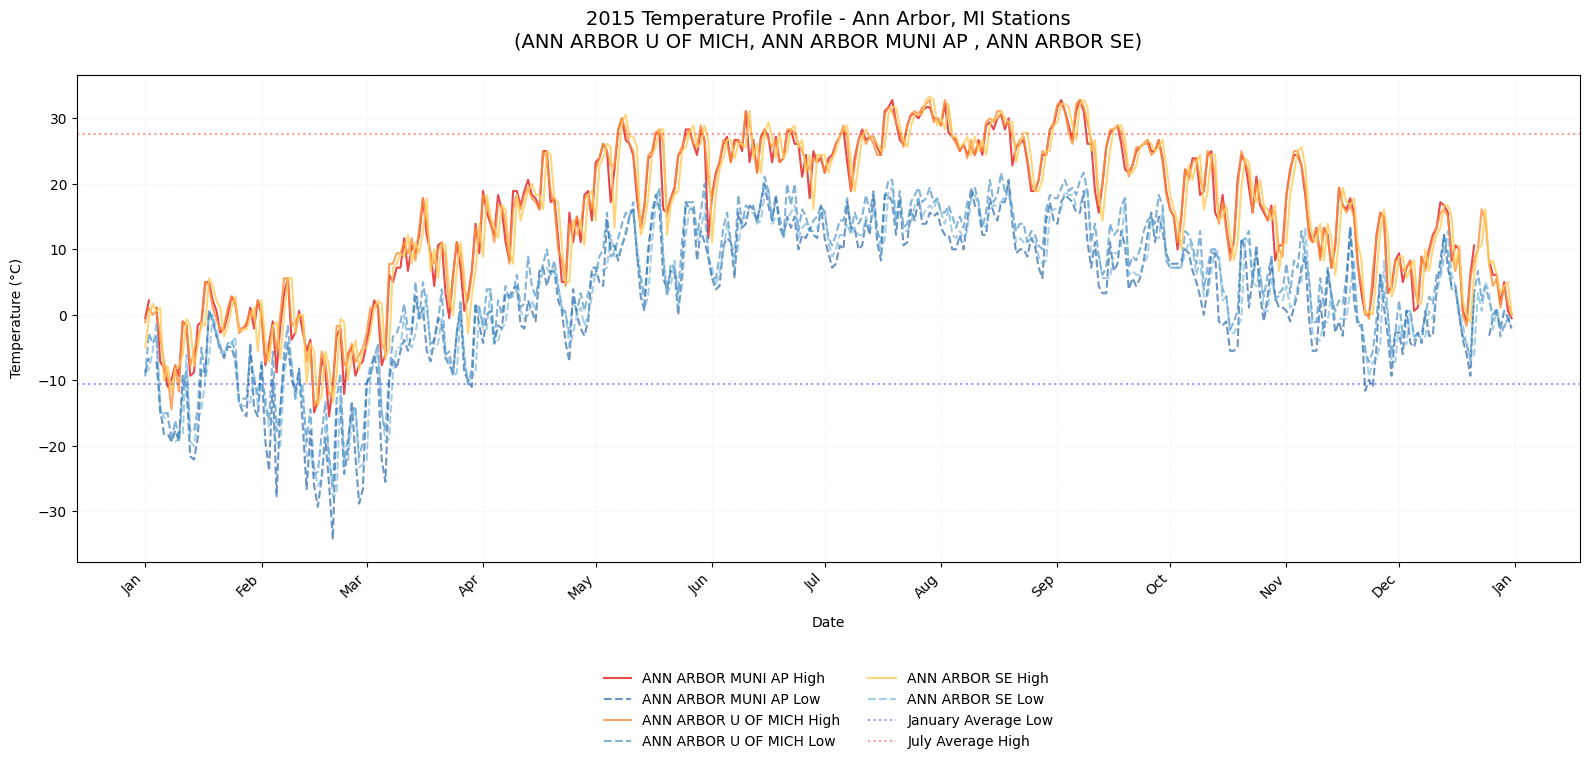

In [48]:
# Filter Ann Arbor stations
ann_arbor_stations = ['ANN ARBOR MUNI AP', 'ANN ARBOR U OF MICH', 'ANN ARBOR SE']


# Prepare 2015 data for Ann Arbor stations
temp_2015_annarbor = merged[
    (merged['Year'] == 2015) &
    (merged['Element'].isin(['TMAX', 'TMIN'])) &
    (merged['NAME'].isin(ann_arbor_stations))
]

# Pivot table with station differentiation
temp_pivot = temp_2015_annarbor.pivot_table(
    index='Date',
    columns=['Element', 'NAME'],
    values='Temp_C',
    aggfunc='mean'
)

# Create plot
plt.figure(figsize=(16, 8))

# Plot daily values for each station
colors = {'TMAX': ['#e31a1c', '#fd8d3c', '#fecc5c', '#ffffb2'],
          'TMIN': ['#08519c', '#3182bd', '#6baed6', '#bdd7e7']}

for idx, station in enumerate(ann_arbor_stations):
    # Plot TMAX
    plt.plot(temp_pivot.index, temp_pivot['TMAX'][station],
            color=colors['TMAX'][idx], linestyle='-',
            label=f'{station} High', alpha=0.8)

    # Plot TMIN
    plt.plot(temp_pivot.index, temp_pivot['TMIN'][station],
            color=colors['TMIN'][idx], linestyle='--',
            label=f'{station} Low', alpha=0.6)

# Add climate context (using Ann Arbor stations only)
jan_avg = temp_2015_annarbor[
    (temp_2015_annarbor['Month'] == 1) &
    (temp_2015_annarbor['Element'] == 'TMIN')
]['Temp_C'].mean()

jul_avg = temp_2015_annarbor[
    (temp_2015_annarbor['Month'] == 7) &
    (temp_2015_annarbor['Element'] == 'TMAX')
]['Temp_C'].mean()

# Formatting
plt.title('2015 Temperature Profile - Ann Arbor, MI Stations\n'
         '(ANN ARBOR U OF MICH, ANN ARBOR MUNI AP , ANN ARBOR SE)',
         fontsize=14, pad=20)
plt.xlabel('Date', labelpad=10)
plt.ylabel('Temperature (°C)', labelpad=10)
plt.grid(alpha=0.2, linestyle=':')

# Add reference lines
plt.axhline(jan_avg, color='blue', linestyle=':', alpha=0.4,
           label='January Average Low')
plt.axhline(jul_avg, color='red', linestyle=':', alpha=0.4,
           label='July Average High')

# Monthly formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Create custom legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:10], labels[:10],  # Show first 10 entries for clarity
          ncol=2, loc='upper center',
          bbox_to_anchor=(0.5, -0.2),
          frameon=False)

plt.tight_layout()
plt.show()



In [47]:
# Get the date of the warmest and coldest days
warmest_day = temp_pivot['TMAX'].idxmax().max()  # Get the latest extreme
coldest_night = temp_pivot['TMIN'].idxmin().min()  # Get the earliest extreme

print(f'''
2015 Temperature Summary for Ann Arbor Stations:
------------------------------------------------
- Warmest Day: {temp_pivot['TMAX'].max(axis=1).max():.1f}°C
  ({warmest_day.strftime('%Y-%m-%d')})
- Coldest Night: {temp_pivot['TMIN'].min(axis=1).min():.1f}°C
  ({coldest_night.strftime('%Y-%m-%d')})
- January Average Low: {jan_avg:.1f}°C
- July Average High: {jul_avg:.1f}°C
''')



2015 Temperature Summary for Ann Arbor Stations:
------------------------------------------------
- Warmest Day: 33.3°C 
  (2015-07-29)
- Coldest Night: -34.3°C 
  (2015-02-20)
- January Average Low: -10.6°C
- July Average High: 27.6°C



In [41]:
print(merged['NAME'].unique())

['ANN ARBOR MUNI AP' 'WHITMORE LAKE 1NW' 'ADRIAN 2 NNE' 'MONROE'
 'ANN ARBOR U OF MICH' 'JACKSON REYNOLDS FLD' 'SALINE' 'HELL'
 'TOLEDO METCALF FLD' 'ANN ARBOR 1W' 'NEWPORT 4SSE' 'BLISSFIELD 1NNE'
 'MILAN 4 ESE' 'CARLETON 2W' 'SAMARIA' 'ANN ARBOR SE' 'DUNDEE'
 'DETROIT WILLOW RUN AP' 'MANCHESTER' 'TIPTON 2WNW' 'TECUMSEH'
 'SALINE 4SW' 'MILAN WWTP' 'CHELSEA']


In [43]:
print(merged.isnull().sum())

ID                 0
Date               0
Element            0
Data_Value         0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
STATE              0
NAME               0
GSNFLAG       165002
HCNFLAG       149133
WMOID         165002
x                  0
y                  0
x_group            0
y_group            0
xy_group           0
hash               0
Year               0
Month              0
Day                0
Temp_C             0
dtype: int64


In [53]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 74.0 MB/s eta 0:00:00
